# Introduction to Policy Based Method

## Recap 
### Value-Based Methods:
* Interaction $\to$ Optimal Value Function $q_*$ $\to$ OptimalPolicy $\pi_*$


* Value Function is represented in form of table, where rows corresponds to states and column corresponds to action.
* And then we use the above table to build an optimal policy.

* **BUT what about environments with much larger state space?**
    * So we investigated how to represent the optimal action value function with a neural network which formed the basis for the deep Q learning algorithm.
    * Input_dim : state_dim , Output_dim: action_dim
    
* But the important message here is that the both cases, whether we use the table for small state spaces or an neural network for much larger state spaces, we had to first **Estimate** optimal action value before we could tackle the optimal policy.

## Million Dollar Question
* Can we directly find the optimal policy without worrying about a value function at all?
    * YES!! -- Policy-based methods.
    

# Policy Function Approximation

* How might we approach this idea of estimating an optimal policy?
    * Let's take cart pole example
    * In this case agent has **two** possible action and dimension of state space is **four**.
    * It can push the cart either left or right.
    * At each time step agents picks one of two actions.
    * And we can construct a neural network that **approximates** the policy, that accepts the state as input.
    * As output, it can return the probability that the agent selects each possible action.
    * So if there are two possible actions, the output layer will have two nodes.
    * The agent uses this policy to interact with the environment by just passing the most recent state to the network.
    * It outputs the action probability and then the agent samples from those probabilities to select an action in response.
* Our objective then is to determine appropriate values for the network weights so that for each state that we pass into the network it returns the **Action probabilities** where the optimal action is most likely selected.
* This will help agent with its goal to maximize expected return.



* This is an iterative process where weights are initially set to the random values.
* Then, as the agent interacts with the environment and learns more about the strategies are best for maximizing reward.

## More on the Policy
* The agent can use a simple neural network architecture to approximate a **Stochastic policy**. The agent passes the current environment state as input to the network, ehich returns action probabilities. Then, the agent samples from those probabilities to select an action.
* The same neural network architecture can be used to approximate a **Deterministic policy**. Instead of sampling from the action probabilities, the agent need only choose the greedy action.
* **SOFTMAX** as output activation function.

## What about continuous action spaces?
*** 
The CartPole environment has a discrete action space. So, how do we use a neural network to approximate a policy, if the environment has a continuous action space?

As we have learned, in the case of **discrete** action spaces, the neural network has one node for each possible action.

For **continuous** action spaces, the neural network has one node for each action entry (or index). For example, consider the action space of the **bipedal walker** environment.
<img src = "./images/a14.png">
In this case, any action is a vector of four numbers, so the output layer of the policy network will have four nodes.

Since every entry in the action must be a number between -1 and 1, we will add a tanh activation function to the output layer.

In `MountainCarContinuous-v0` environment. The Layer size 1, Activation function: tanh

# Hill Climbing
* So remember that the agent goal is always to **maximize expected return**.
* Let's denote the expected return as $J$.
* And weights in NeuralNetwork as $\theta$.
* And there's some mathematical relationship between $\theta$ and the expected return $J$.
* This is because $\theta $ encodes the policy which makes some action more likely than others, and depending on action that influences the reward and then we sum up the rewards to get the return.
* The main idea is that it's possible to write the expected return $J$ as the function of $\theta$ for e.g. $J = F(\theta)$.
> $J(\theta) = \sum_{\tau} P(\tau;\theta)R(\tau)$
<br>$\sum_{\tau} P(\tau;\theta)R(\tau)$ = Expected value of reward across $\tau$ timesteps, Expected value of a probability distribution is summation of probability of each sample in that distribution times(product) value of that sample.

* And we want to optimize the values of $\theta$ such that it **maximizes the EXPECTED RETURN** $J$.

### Hill Climbing
* We begin with an initially random set of weights $\theta$.We collect a single **episode** with the policy that corresponds to those weights and then record the return.
* This return is an estimate of what the surface looks like at that value of $\theta$.
* Now it's not going to be a perfect estimate because the return we just collected is unlike to be equal to the expected return, but in practice the estimates often turns out to be good enough.
* Then we add little bit of noise to those weights to give us another set of candidate weights we can try.
* **To see how good those new weights are, we'll use the policy that they give us to again iteract with the environment for an episode and add up the return.**
* In up the new weights, give us __more__ return than our current best estimate, we focus our attention on that new value, and then we just repeat by iteratively proposing new policies in the hope that they outperform the existing policy.
* In the event that they don't we go back to our previous best policy.

### Working of the process
* Consider the case that the neural network has only two weights.
* The agent's goal is to maximize expected return $J$.
* The weights in the neural network are $\theta = (\theta_0,\theta_1)$
* Then we can plot the expected return $J$ as a function of the values of both weights.

* Once we get that function we can optimize our $\theta$ values so that we can maximize the expected return function $J$.

#### Gradient Ascent
* **Gradient ascent** is similar to gradient descent.
    * Gradient descent steps in the **direction opposite the gradient**, since it wants to minimize a function.
    * Gradient ascent is otherwise identical, expcept we step in the **direction of the gradient**, to reach the maximum.
    
#### Local Minima 
In the video above, we learned that **hill climbing** is relatively simple algorithm that the agent can use to gradually improve the weights $\theta$ in its policy network while interacting with environment.

Note however, that it's **not** guaranteed to always yield the weights of the optimal policy. This is because we can easily get stuck in a local maximum. In this lesson, we'll learn about some policy-based methods that are less prone to this.


## Hill Climbing Pseudocode
* Initialize the weights $\theta$ in the policy arbitrarily.
* Collect an episode with $\theta$, and record the return $G$.
* $\theta_{best} \gets \theta; G_{best} \gets G$
* Add a little bit of random noise to $\theta_{best}$, to get a new set of weights $\theta_{new}$.
* Collect an episode with $\theta_{new}$, and record the return $G_{new}$
* if $G_{new} > G_{best}$ then :
    * $G_{best} \gets G_{new}$, $\theta_{best} \gets \theta_{new}$
* And repeat until we get optimal policy.


### What's the difference between G and J?
Well .. in reinforcement learning, the goal of the agent is to find the value of the policy network weights $\theta$ that maximizes **expected** return, which we have denoted by $J$.

In the hill climbing algorithm, the values of $\theta$ are evaluated according to how much return $G$ they collected in a **single episode**. To see that this might be a little bit strange, note that due to randomness in the environment (and the policy, if it is stochastic), it is highly likely that if we collect a second episode with the same values for $\theta$ we'll likely get a different value for the return $G$. Because of this, the (sampled) return $G$ is not perfect estimate for the expected return $J$, but it often turns out to be **good enough** in practice.
    

## Beyond Hill Climbing 

We denoted the expected return by $J$. Likewise, we used $\theta$ to refer to weights in the policy network. Then, since $\theta$ encodes the policy, which influences how much reward the agent will likely receive, we know that $J$ is a function of $\theta$.

Despite the fact that we have no idea what that function $J = J(\theta)$ looks like, the *hill climbing* algorithm helps us determine the value of $\theta$ that maximizes it.

## Note
We refer to the general class of approaches that find $arg\ max_{\theta} J(\theta)$ through randomly pertubring the most recent best estimate as **stochastic policy search.**. Likewise, we can refer to $J$ as an **objective function**, which just refers to the fact that we'd like to *maximize it*!


### Improvements in Hill Climbing algorithm
* One small improvement to this approach is to choose a small number of neighboring policies at each iteration and pick the best among a small number of neighboring policies at each iteration and pick the best among them.
* Generate a few candidate policies by perturbing the parameters randomly and evaluate each policy by iterating with environment. 
* This give us an idea of the **neighborhood** of the current policy.
* Now pick the candidate policy that looks most promising and iterate.
* This variation is known as **steepest ascent hill climbing** and it helps to reduce the risk of selecting a next policy that may lead to suboptimal solution.

## Stimulated Annealing 
* Stimulated annealing uses a predefined schedule to control how the policy space is explored.
* Starting with a large noise parameter, that is broad neighborhood to explore, we gradually reduce the noise or radius as we get closer and closer to the optimal solution.


## Adaptive Noise (Scaling)
* Whenever we find a better policy than before, we're likely getting closer to the optimal policy.
* This translate to reducing or decaying the variance of the Gaussian noise we add.
* But if we don't find a better policy it's probably a good idea to increase our search radius and continue exploring from the current best policy.
* This small tweak to stochastic policy makes it much less likely to get stuck, especially in domains with a complicated objective function.

## More Black-Box Optimization

All algorithms that we've learned about in this lesson can be classified as **black box optimization** techniques.

**Black-box** refers to the fact that in order to find the value of $\theta$ that maximizes the function $J = J(\theta)$, we need only to estimate the value of $J$ at any potential value of $\theta$.

That is, both hill climbing and steepest ascent hill climbing don't know that we're solving a reinforcement learning problem, and they don not care that the function we're trying to maximize corresponding to the expected return.

These algorithm only know that for each value of $\theta$, there's corresponding to $\theta$ to collect an episode, but the algorithm are not aware of this. To these algorithms, the way we evaluate $\theta$ is considered a black box, and they don't worry about the details. The algorithms only care about finding the value of $\theta$ that will maximize the number comes out of the black box.



## Cross-Entropy method
* Hill climbing begins with a best guess for the weights, then it adds a little bit of noise to propose one new policy that might perfrom better.
* **Steepest-ascent Hill climbing**, does a little bit more work by generating several neighboring policies at each iteration.
* But in both cases, only the best policy prevails.
* In **Steepest-ascent Hill climbing** there's a lot of useful information that we're **throwing** out.
* Now we'learn about some methods that leverage useful information from the weights that aren't selected as best.
#### The process
* So what if, instead of selecting only the best policy, we selected the top 10 or 20 percent of them, and took the average?
* This what the **Cross -Entropy Method** does.
## Evolution Strategies
* Another approach is to look at the return that was collected by __each__ candidate policy.
* The best policy will be the **Weighted** sum of all of these, where poicies that got higher return, are given more say or get higher weight.
* This technique is called **Evolution Strategies**
#### Background of evolution strategies
* The name originally comes form the idea of biological evolution, where the idea is that the most successful individuals in the policy population, will have the most influence on the next generation or iteration.
* Evolution strategies as just another black box optimization technique.

# Hill Climbing Implementations
---

In this part, we will train hill climbing with adaptive noise scaling with OpenAI Gym's Cartpole environment.


## 1. Import the Necessary Packages

In [1]:
import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

#!python -m pip install pyvirtualdisplay
# from pyvirtualdisplay import Display
# display = Display(visible=0, size=(1400,900))
# display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display
plt.ion()

## 2. Define the Policy

In [2]:
env = gym.make('CartPole-v0')
print('observation space:', env.observation_space)
print('action space:', env.action_space)

class Policy():
    def __init__(self, s_size=4, a_size=2):
        self.w = 1e-4*np.random.rand(s_size, a_size) ##weights for simple linear policy: state_space x action_space
    
    def forward(self, state):
        x = np.dot(state,self.w)
        ## below is the implementation of softmax function!!
        return np.exp(x)/sum(np.exp(x))
    
    def act(self,state):
        probs = self.forward(state)
        #action = np.random.choice(2,p=probs)
        action = np.argmax(probs)
        # option 1: stochastic policy
        # option 2: stochastic policy
        return action
                             

observation space: Box(4,)
action space: Discrete(2)


## 3. Train the Agent with Stochastic Policy Search

In [3]:
env = gym.make('CartPole-v0')
env.seed(0)
np.random.seed(0)

policy = Policy()

def hill_climbing(n_episodes=1000, max_t=1000, gamma=1.0, print_every=100, noise_scale=1e-2):
    """Implementation of hill climbing with adaptive noise scaling.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        gamma (float): discount rate
        print_every (int): how often to print average score (over last 100 episodes)
        noise_scale (float): standard deviation of additive noise
    """
    
    scores_deque =deque(maxlen=100)
    scores =[]
    best_R = -np.Inf
    best_w = policy.w
    for i_episode in range(1, n_episodes+1):
        rewards = []
        state = env.reset()
        for t in range(max_t):
            action = policy.act(state)
            state, reward, done, _ = env.step(action)
            rewards.append(reward)
            if done:
                break
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))
        discounts = [gamma**i for i in range(len(rewards)+1)]
        R = sum([a*b for a,b in zip(discounts,rewards)])

        ## Adaptive noise
        if R>= best_R: ##found better weights
            best_R = R
            best_w = policy.w
            noise_scale = max(1e-3, noise_scale/2)
            policy.w += noise_scale*np.random.rand(*policy.w.shape)
            ## reducing the noise becuase we found a better policy
        else: #did not find better weights
            noise_scale = min(2,noise_scale*2)
            policy.w = best_w + noise_scale * np.random.rand(*policy.w.shape)
            ## update step is intresting as we can see that when we did not find
            ## better weights then we are changing our weights as current_best (weight)
            ## plus the current set of weight with scaled up noise.

        if i_episode % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode,np.mean(scores_deque)))
        if np.mean(scores_deque)>=195.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100,np.mean(scores_deque)))
            policy.w = best_w
            break
    return scores

scores = hill_climbing()

Episode 100	Average Score: 175.24
Environment solved in 13 episodes!	Average Score: 196.21


## 4. Plot the Scores


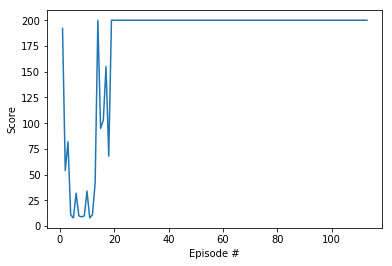

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Now lets dump the weights

```python
import pickle
with open('hill_climbing_weight.pickle','wb') as f:
    pickle.dump(policy.w,f)
```    

## Lets Load the weight

In [9]:
with open('hill_climbing_weight.pickle','rb') as f:
    weight = pickle.load(f)
print(weight)

[[3.67007655 3.99217429]
 [3.0201702  4.78574431]
 [4.227067   5.64274125]
 [2.8429369  4.54045784]]


## Why Policy-Based Methods?
* Simplicity 
* Stochastic Policies
* Continuous Action Space

1. __Policy__
    - Determinisitc: $\pi : s \to a$
    - Stochastic : $\pi(s,a) = P[a|s]$
* Formulating policy in this manner allows us to make such generalizations where possible and focus more on the complicated regions of state space.
* One of the main advantages of policy-based methods over value-based methods is that they can learn true stochastic policies.


## Alias State
* Alias states are identical state, accroding to state feature(which can be limited, and reality are not identical) and have different optimal actions, but agent cannot differentiate between the states.
* Best action that can be taken in these states are equiproable random action -- which value based methods are not able to do.
* So the question is why value based methods are not good in these **alias state**?
    * Because in value based the method; the method or technique by which we take random action is **epsilon-greedy method** and after training a value based method, our epsilon is small, becuase we can't take anymore random actions with smart agent!

* So the only way to take **equiproable random actions** is through policy based methods.




* In this example the information that agent has:
    * smooth or rough surface
    * side walls
   
<img src = "images/a15.png">

## Continuous action space
* Policy based methods are well suited for continuous action spaces.
* When we use a value based method even with function approximator, our output consists of a value for each action. 
* Now if actin space is discrete and there are finite number of actions, we can easily pick the action with the maximum value.
* But if action space is continuous, then this max operation turns out to be a **optimization problem itself**.
* It like trying to find a global maximum of a continuous function which is non-trivial.